In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("Churn_Modelling.csv")

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data['Surname']

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

<AxesSubplot:>

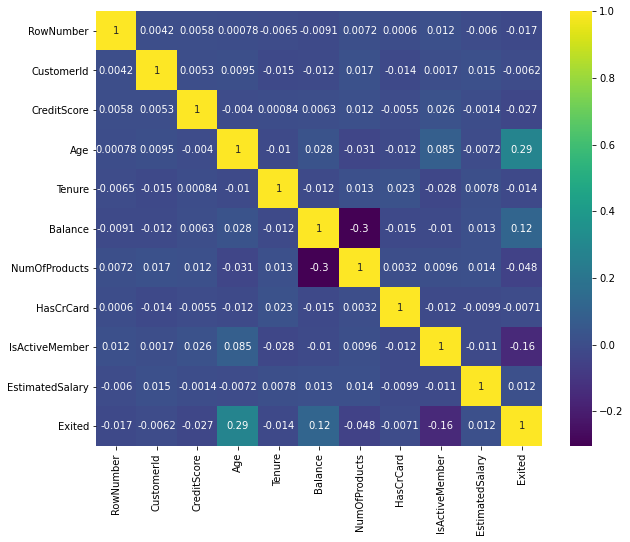

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns',inplace=True)

In [13]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
def unique_values(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col}:{df[col].unique()}')

In [16]:
unique_values(data)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [17]:
data['Geography'].replace({'France':1,'Spain':2,'Germany':3},inplace=True)

In [18]:
data['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [20]:
data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.749500,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,3.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,3.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
data=pd.get_dummies(data,columns=['Geography', 'Gender','HasCrCard', 'IsActiveMember'])

In [26]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Exited', 'Geography_1', 'Geography_2',
       'Geography_3', 'Gender_0', 'Gender_1', 'HasCrCard_0', 'HasCrCard_1',
       'IsActiveMember_0', 'IsActiveMember_1'],
      dtype='object')

In [27]:
cols_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data[cols_to_scale]=scaler.fit_transform(data[cols_to_scale])

In [28]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_1,Geography_2,Geography_3,Gender_0,Gender_1,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,1,1,0,0,0,1,0,1,0,1
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0,0,1,0,0,1,1,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1,1,0,0,0,1,0,1,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0,1,0,0,0,1,1,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0,0,1,0,0,1,0,1,0,1


In [37]:
from sklearn.model_selection import train_test_split

X=data.drop('Exited',axis='columns')
y=data['Exited']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [39]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_1,Geography_2,Geography_3,Gender_0,Gender_1,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,1,0,0,0,1,0,1,0,1
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0,1,0,0,1,1,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1,0,0,0,1,0,1,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,1,0,0,0,1,1,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0,1,0,0,1,0,1,0,1


In [40]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [42]:
X_train.shape

(7500, 15)

In [43]:
len(X.columns)

15

##### Building an Artificial NN

In [52]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [57]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units',
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                           activation='relu'))
    model.add(layers.Dense(10, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [58]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Bank Turnover')

INFO:tensorflow:Reloading Oracle from existing project project\Bank Turnover\oracle.json


In [59]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [60]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.8052000006039938

Best val_accuracy So Far: 0.8561333219210306
Total elapsed time: 00h 00m 23s
INFO:tensorflow:Oracle triggered exit


In [61]:
models = tuner.get_best_models(num_models=2)

In [65]:
tuner.get_best_models(num_models=2)

In [63]:
print(tuner.results_summary())

Results summary
Results in project\Bank Turnover
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 352
learning_rate: 0.01
Score: 0.8561333219210306
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.001
Score: 0.8274666666984558
Trial summary
Hyperparameters:
units: 352
learning_rate: 0.0001
Score: 0.8052000006039938
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.0001
Score: 0.8010666569073995
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.0001
Score: 0.8001333475112915
None
